In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


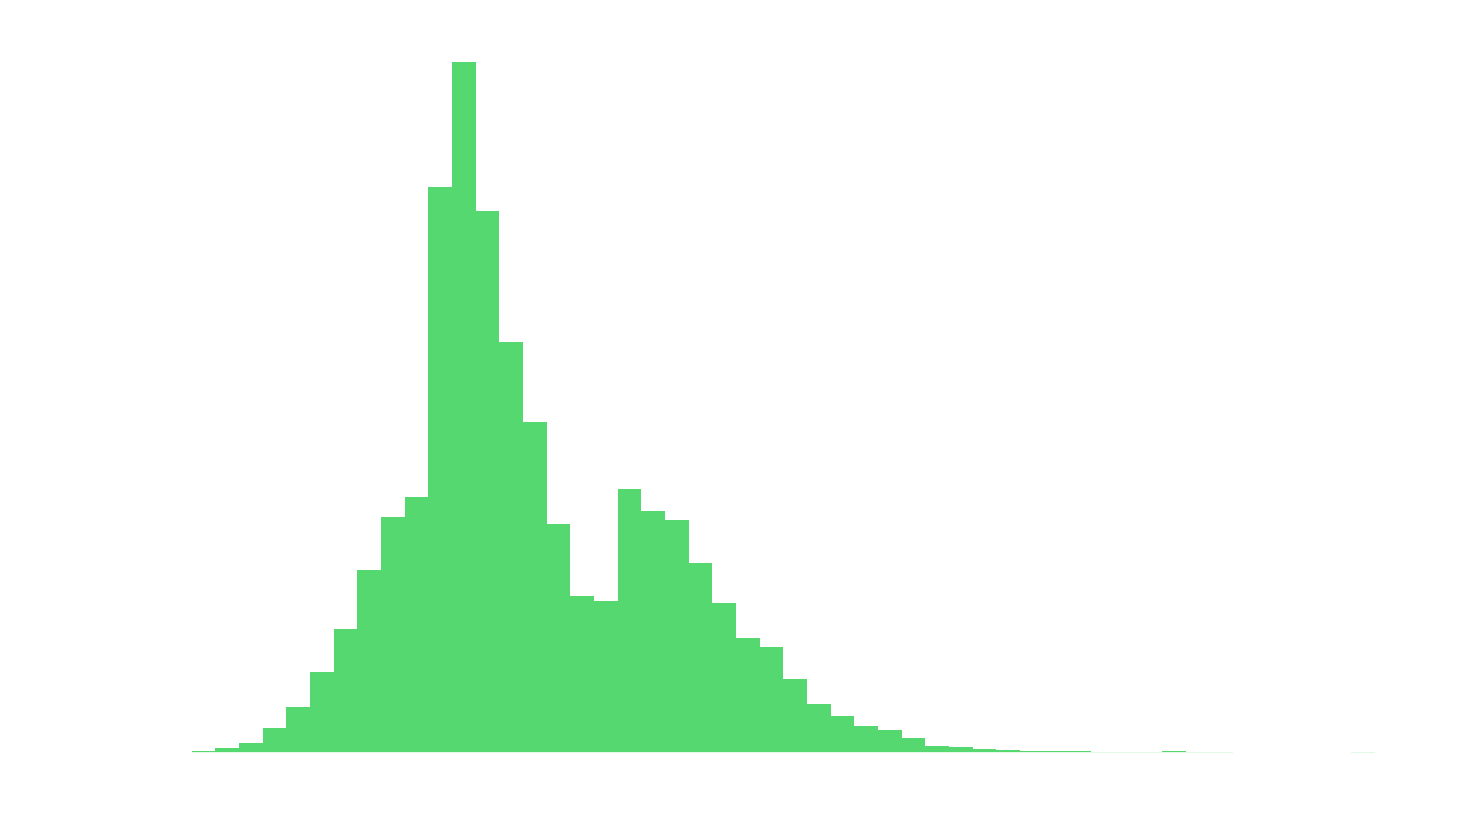

In [3]:
data = np.loadtxt('../data/dataset.txt')
plt.hist(data);

# Centrality
### Mean

In [7]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)
print(get_mean([3,5,2,6]));

4.0


In [9]:
mean = np.mean(data)

# np.average can be used to do weigthed average
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


#  Median, the data has to be sorted


In [15]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid-1: mid +1])
print(get_median([7,7,3,1,4,5]))

4.5


In [16]:
median = np.median(data)
median

6.7325

#### mean is sensitive to the outlier meanwhile median is not

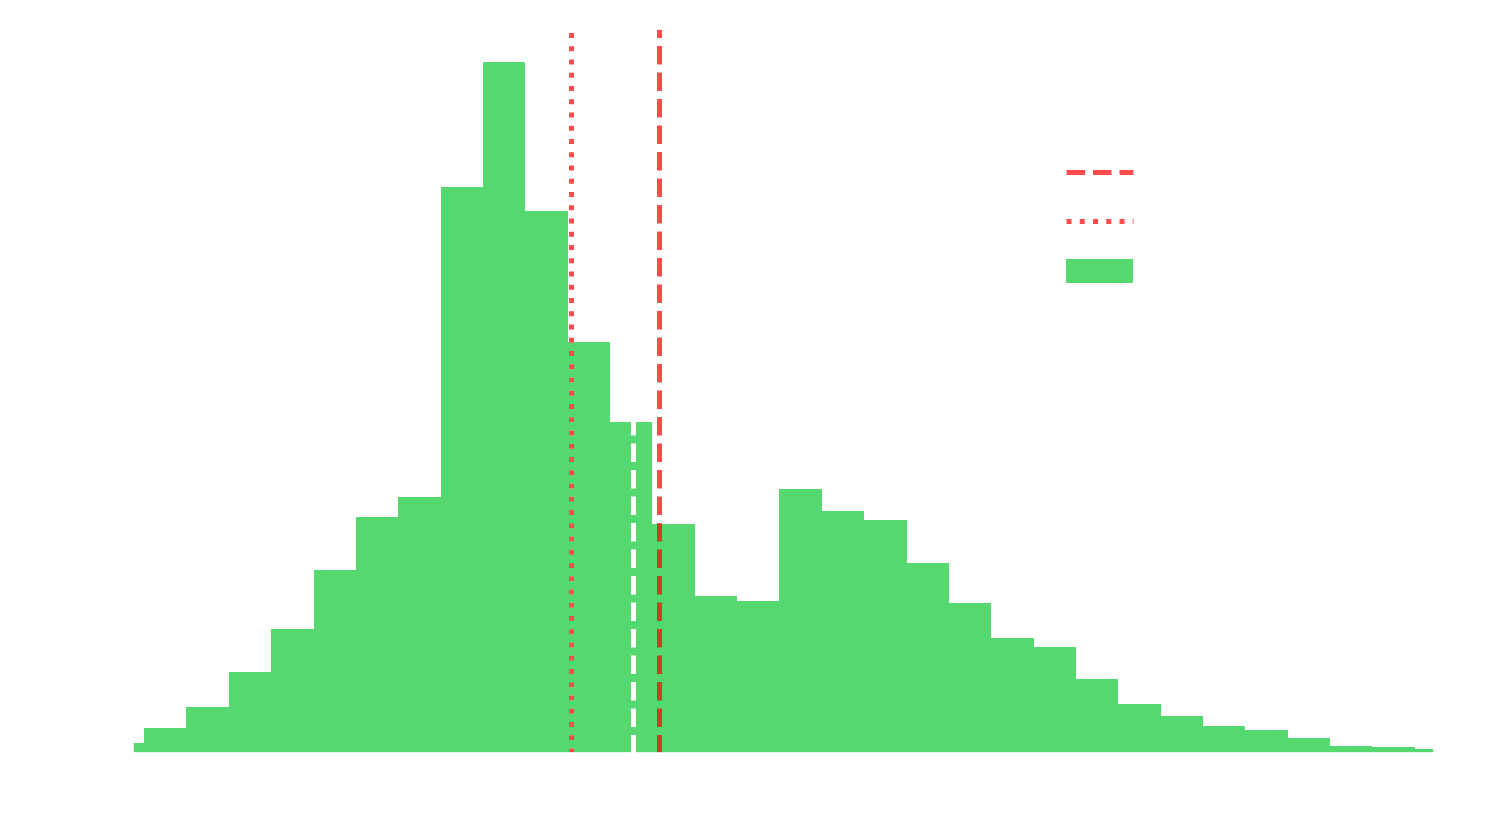

In [17]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data")
plt.axvline(np.mean(data), ls='--', label='Mean Data')
plt.axvline(np.median(data), ls=':', label='Median Data')
plt.axvline(np.mean(outlier), c='r', ls='--', label='Mean Outlier', alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=':', label='Median Outlier', alpha=0.7)
plt.legend()
plt.xlim(0, 20);


### Mode: the most common that show ups
The mode works mainly fro discrete distributions like countable distribution not measurable like heights or weights;

In [19]:
values, counts = np.unique([1,7,2,5,3,3,8,3,2], return_counts=True)
counts

array([1, 2, 3, 1, 1, 1], dtype=int64)

In [20]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,7,2,5,3,3,8,3,2]))

3


In [36]:
mode = st.mode(data)
mode

ModeResult(mode=array([5.519]), count=array([9]))

In [46]:
hist, edges = np.histogram(data, bins=10000)
edge_centers = 0.5 * (edges[:1] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode);

1.8204224



###### For a discrete distribution mode is super simple, for a continuous is not that simple

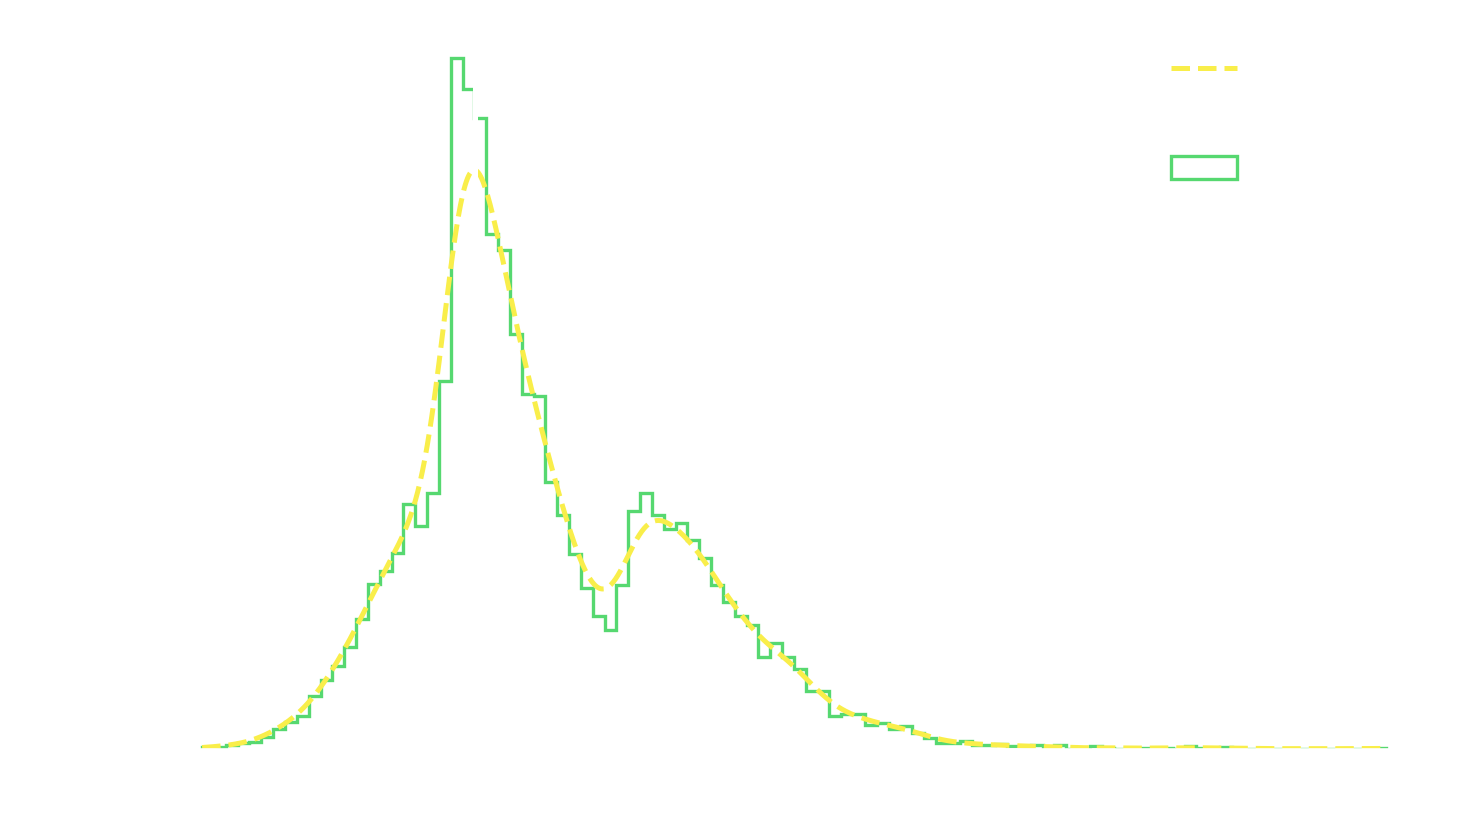

In [51]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=100, density=True, label='Data hist', histtype='step')
plt.plot(xvals, yvals, label='KDE')
plt.axvline(mode, label="Mode")
plt.legend();


# Comparison

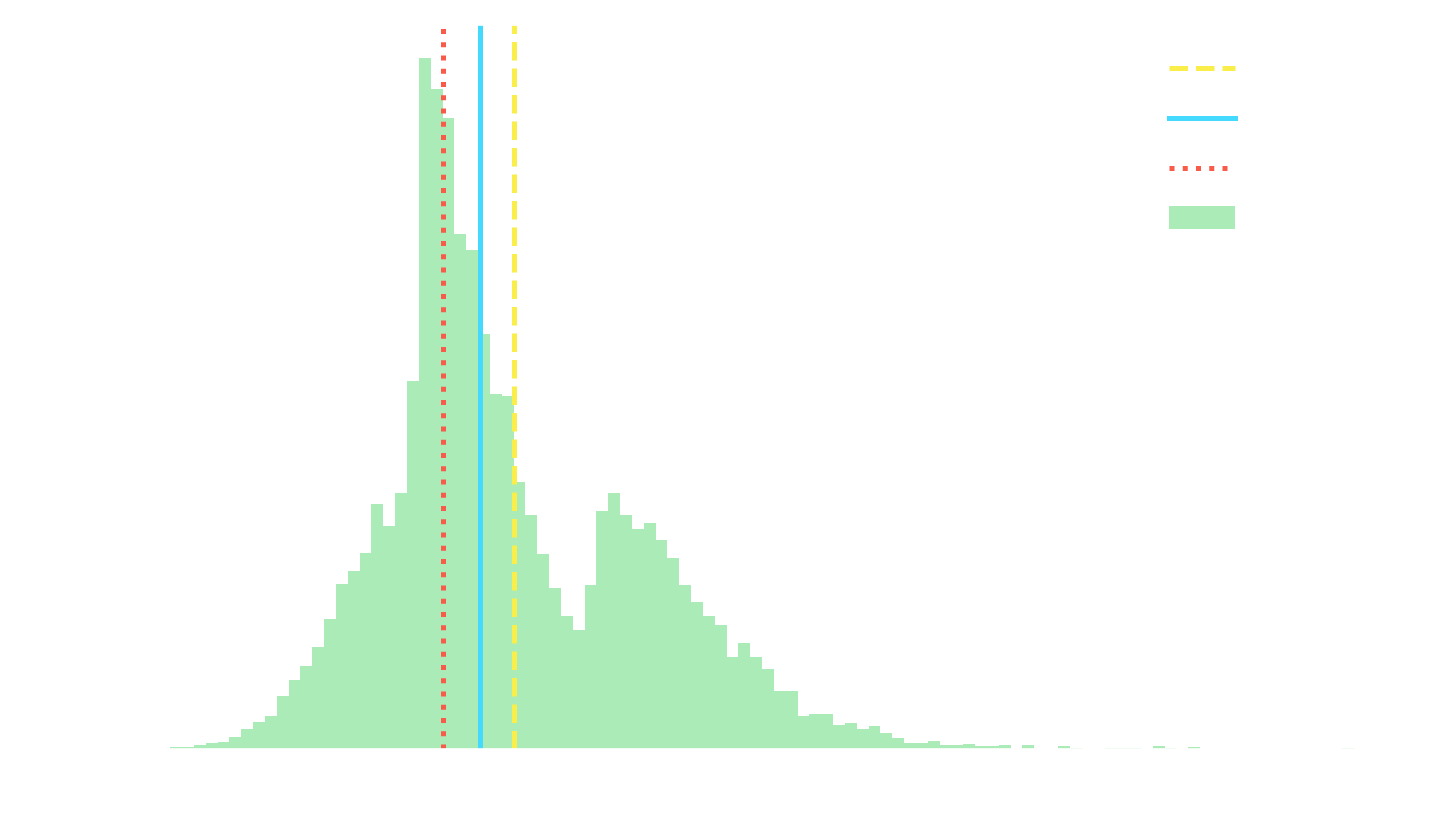

In [52]:
plt.hist(data, bins=100, label='Data', alpha=0.5)
plt.axvline(mean, label='Mean', ls='--', c='#f9ee4a')
plt.axvline(median, label='Median', ls='-', c='#44d9ff')
plt.axvline(mode, label='Mode', ls=':', c='#f95b4a')
plt.legend();

# Measures of width and balance
* Variance (how much it spread out around the mean) (N - 1 unbiased sample)
* Standard deviation
* Skeweness
* Kurtosis

In [56]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)

print(get_variance([1,2,3,4,5]))

2.5


In [58]:
variance = np.var([1,2,3,4,5], ddof=1) # unbiased sample (N-1)
variance

2.5

In [59]:
variance = np.var(data, ddof=1) # (N-1)
variance

13.137626632694301

### Standard Deviation
Square root of the variance

In [62]:
std = np.std(data)
std, std**2

(3.6244414221454435, 13.136575622563685)

## Our powers combined

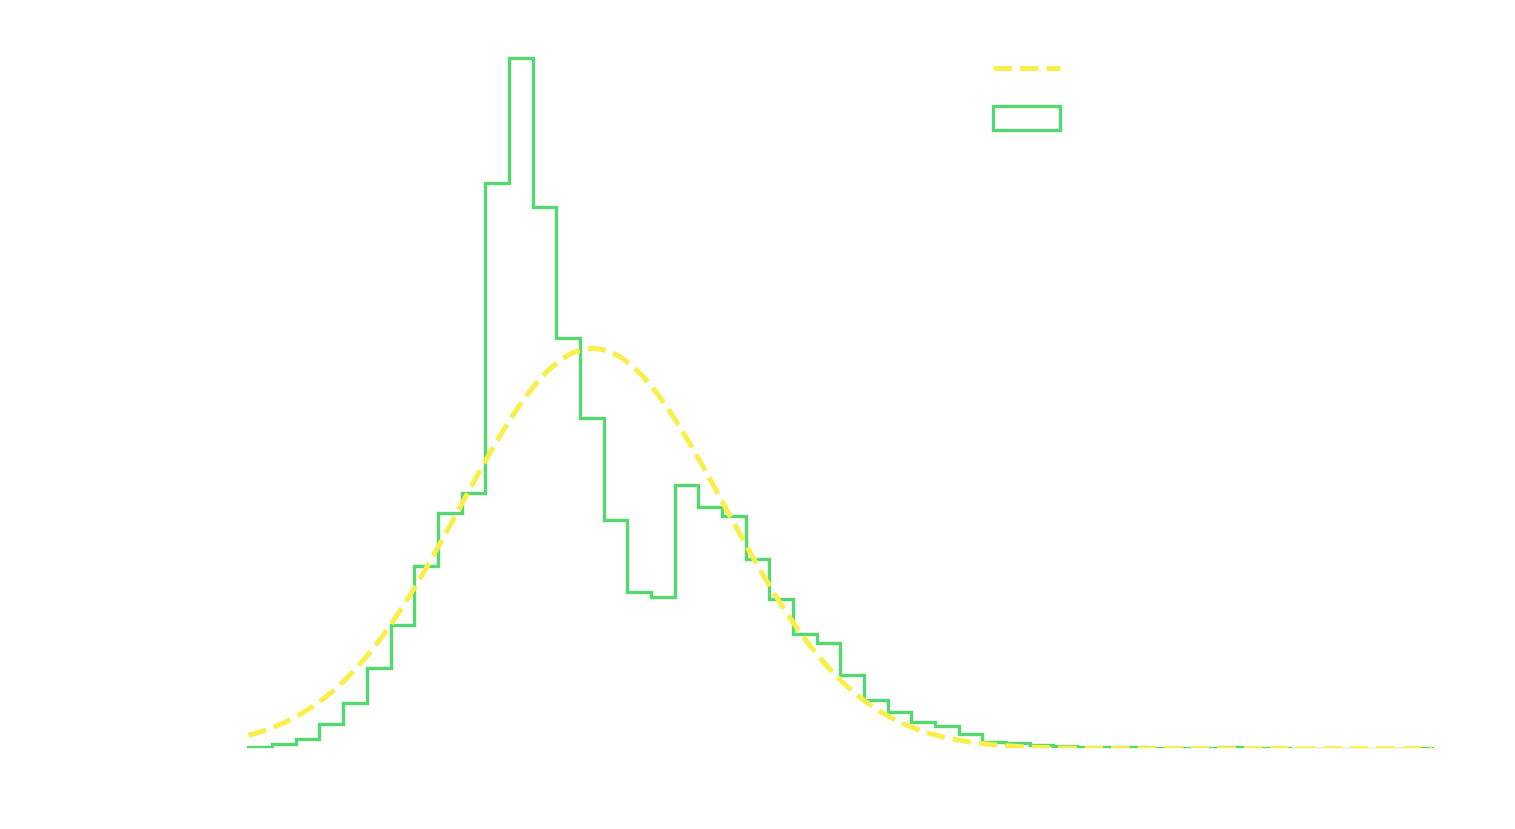

In [64]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys, label='Normal approximation')
plt.legend()
plt.ylabel('Probability');


## Skewness
The first moment is zero by definition, the second is variance, the third is skewness;

In [65]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
get_skewness([1,2,3,4,5])

0.0

In [66]:
skewness = st.skew(data)
get_skewness(data), skewness

(0.7408773663373582, 0.7408773663373577)

## Gaussian distribution with skewness

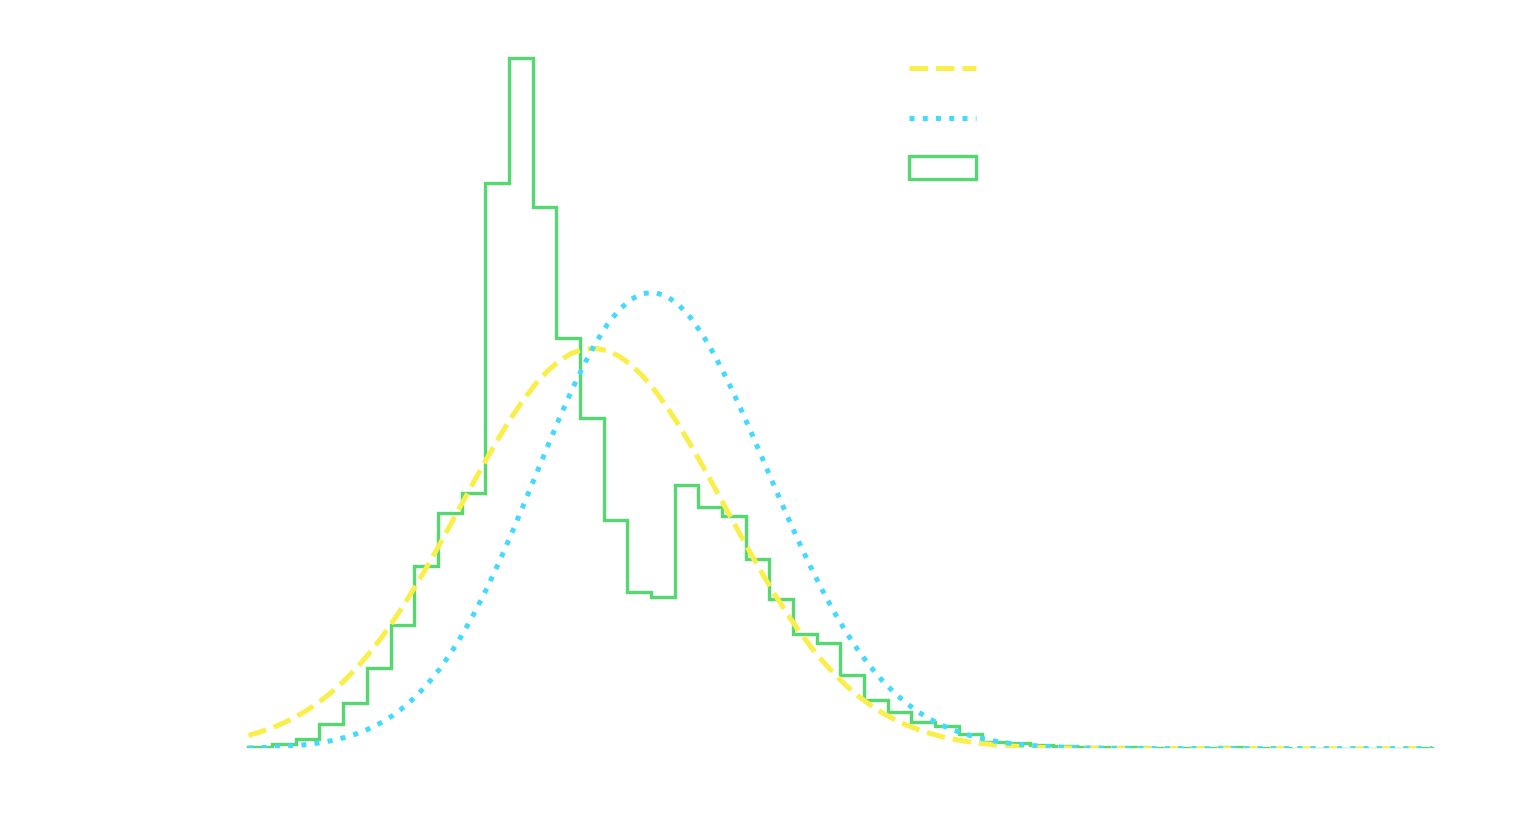

In [67]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std) # gaussian approximation
# the mean of the skewed distribution changed
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std) # skewed gaussian approximation

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys1, label='Normal approximation')
plt.plot(xs, ys2, label='Skewnormal approximation')
plt.legend()
plt.ylabel('Probability');

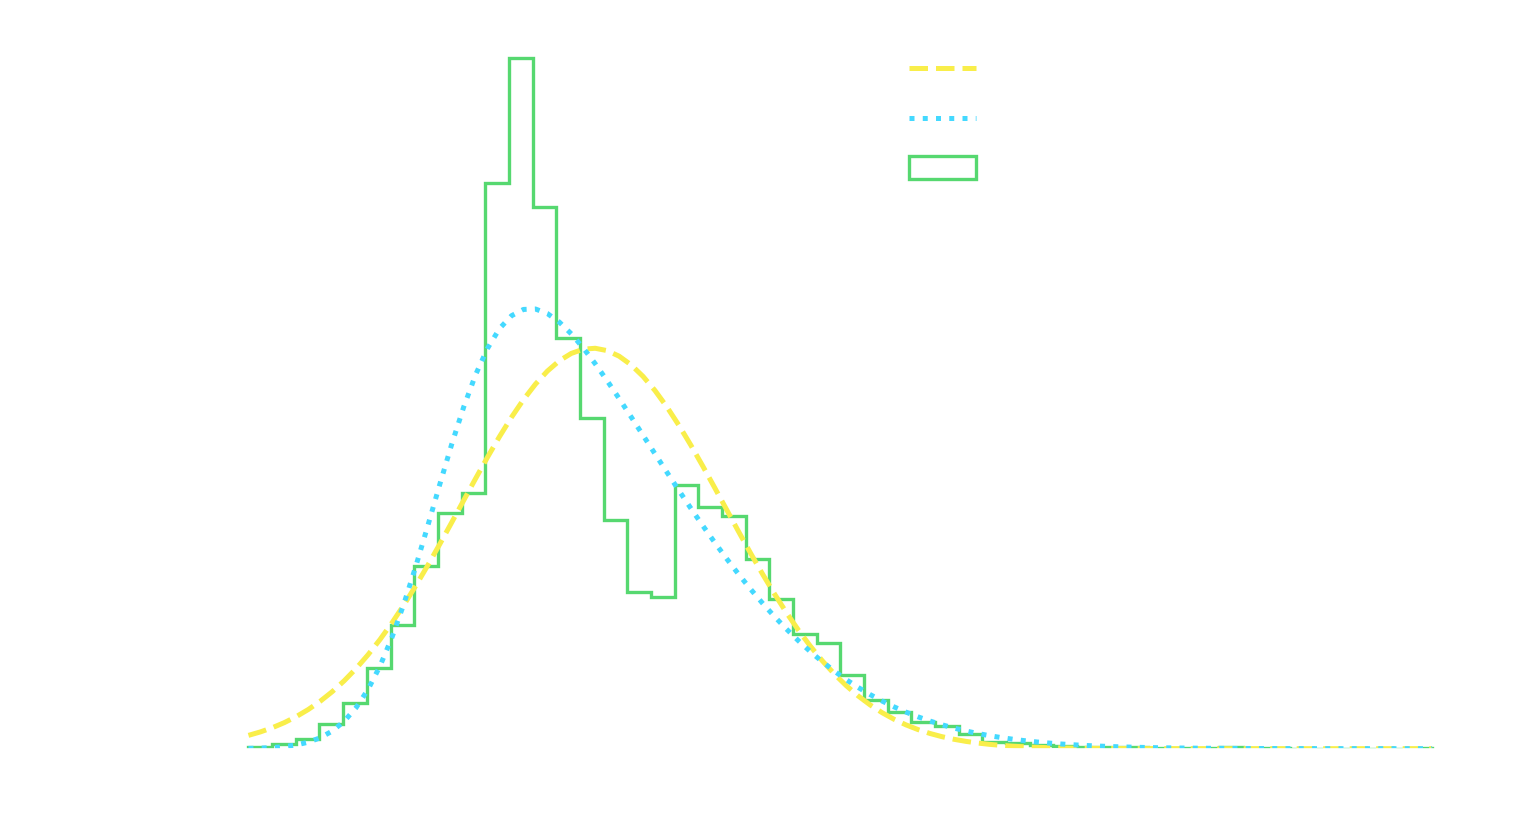

In [68]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std) # gaussian normal approximation
# the mean of the skewed distribution changed so we need to fit that;
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps) # skewed gaussian approximation

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys1, label='Normal approximation')
plt.plot(xs, ys2, label='Skewnormal approximation')
plt.legend()
plt.ylabel('Probability');

## Kurtosis
The last "moment"

In [70]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**4
    return (summed / (len(xs))) / (var ** 2)
get_kurtosis([1,2,3,4,5])

1.7

In [73]:
kurtosis = st.kurtosis(data, fisher=False) #Fisher is just a way to normalize the Kurtosis
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


## Percentiles
What is we - instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles? We could essentially reconstruct our data distribution to an arbitrary accuracy and never worry about analytic functions.

Text(0, 0.5, 'Percentile')

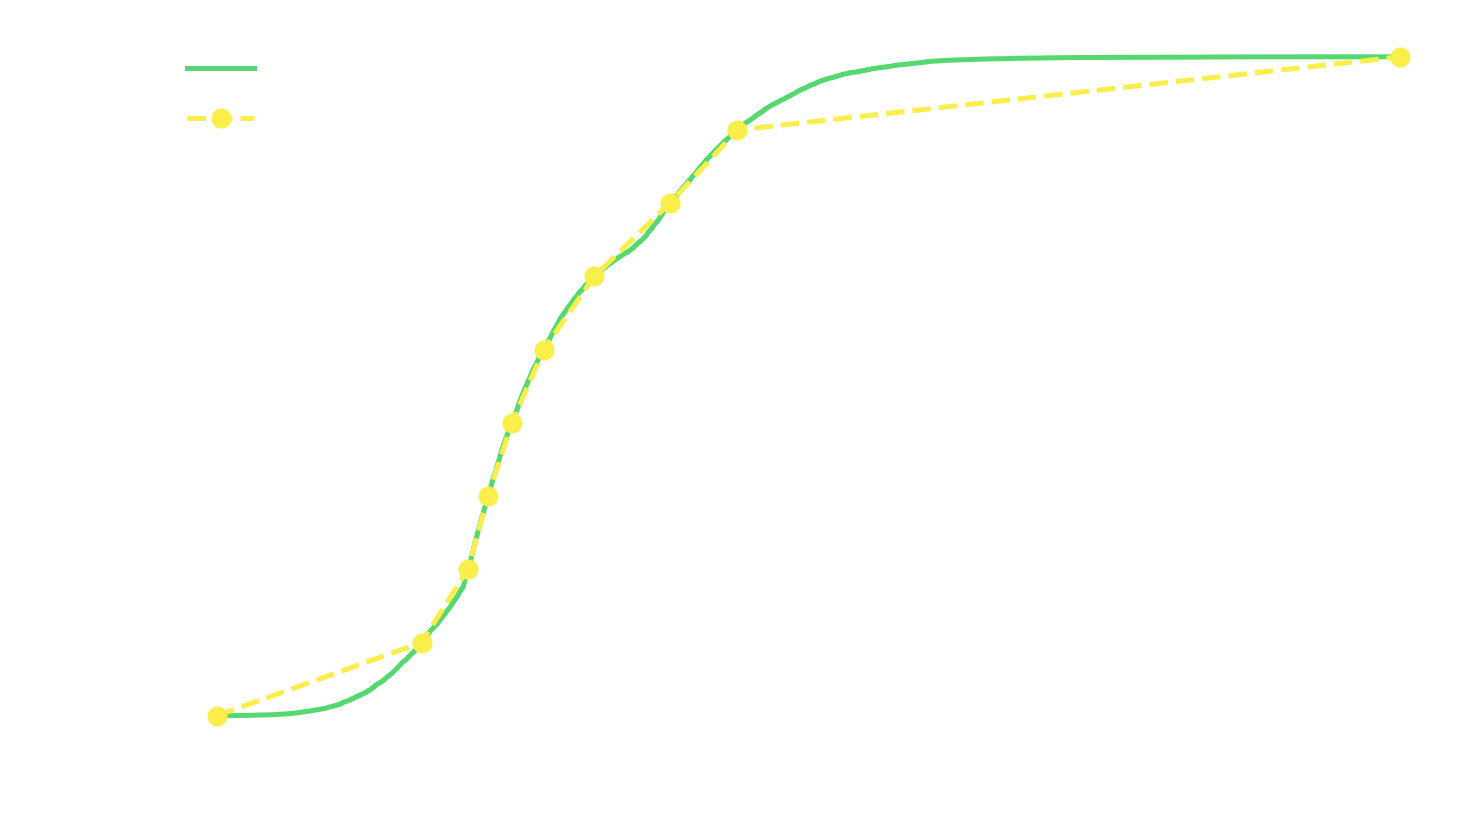

In [84]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0,1,len(data))

plt.plot(xs, ys * 100, label='ECDF') # empirical acumulative distribution 0-100% of the data
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10) # yellow 10% up to 100% calculation
plt.legend()
plt.ylabel('Percentile')


Text(0, 0.5, 'Percentile')

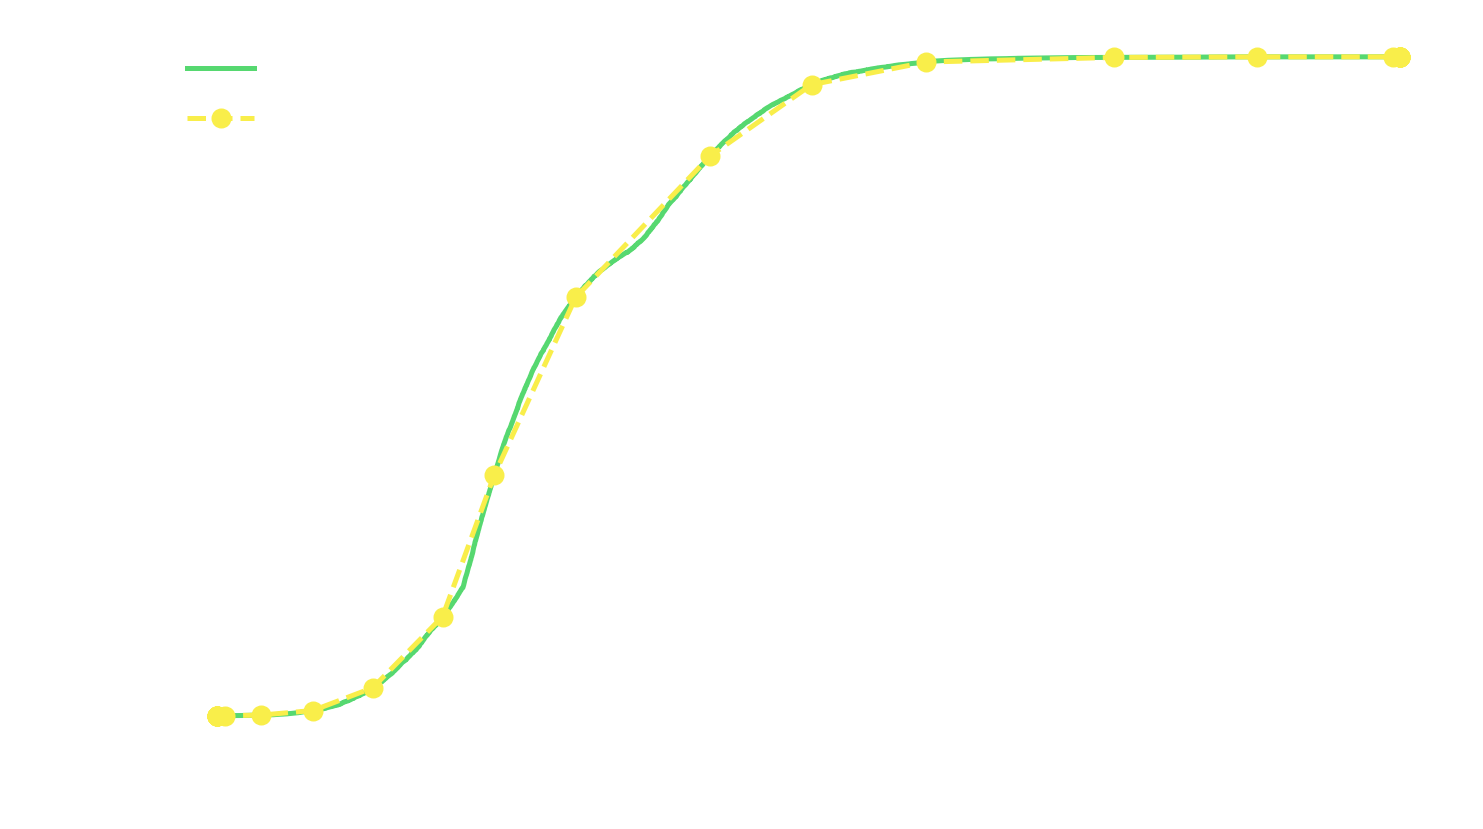

In [87]:
ps = 100 * st.norm.cdf(np.linspace(-4, 4, 30)) 
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0,1,len(data))

plt.plot(xs, ys * 100, label='ECDF') # empirical acumulative distribution 0-100% of the data
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10) # yellow 10% up to 100% calculation
plt.legend()
plt.ylabel('Percentile')


Text(0, 0.5, 'Percentile')

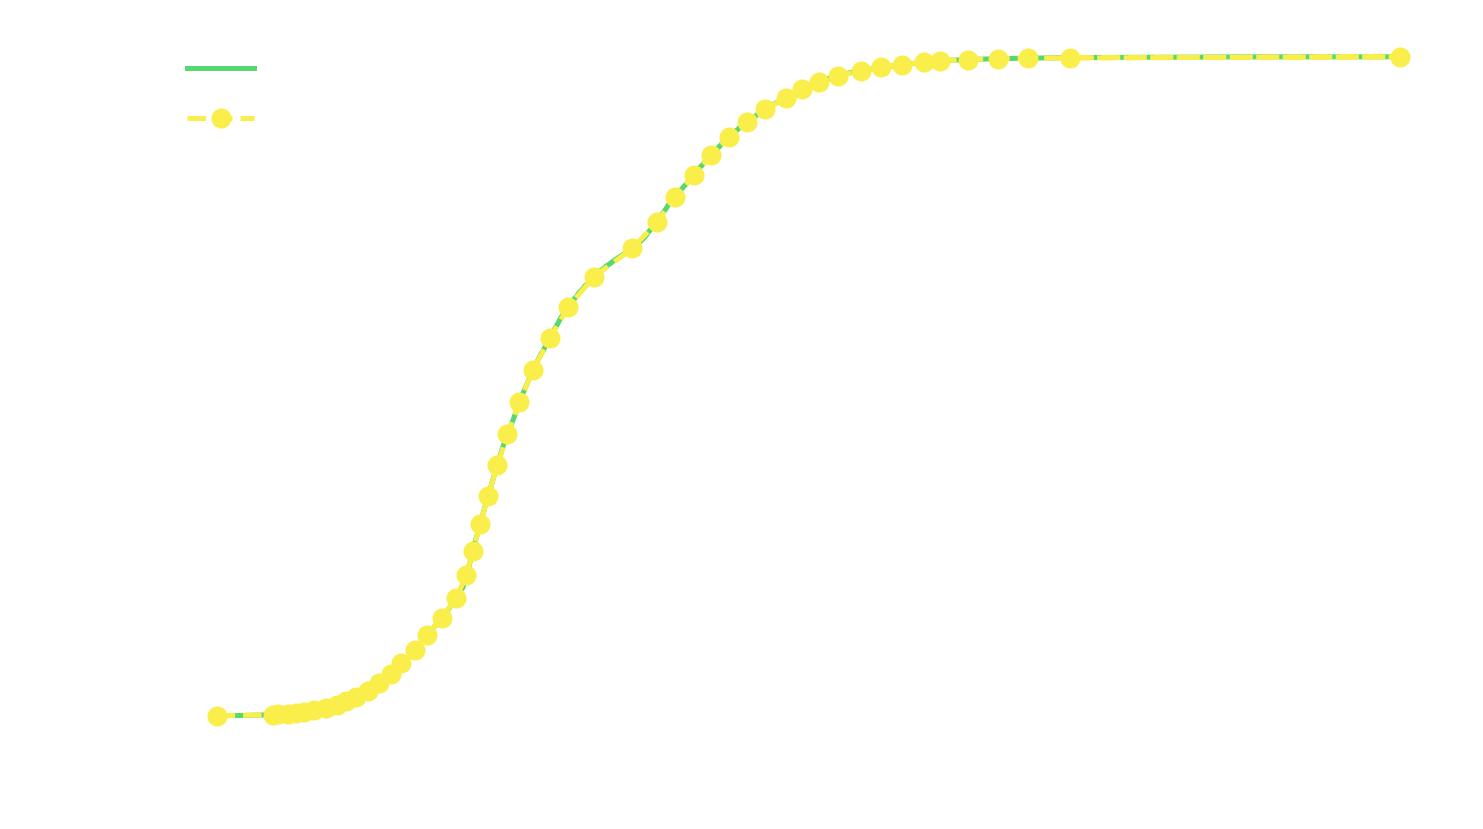

In [94]:
# Get the oercentiles from the beginning up to the end of the line
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.insert(ps, 0, 0)
ps = np.insert(ps, -1, 100)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0,1,len(data))

plt.plot(xs, ys * 100, label='ECDF') # empirical acumulative distribution 0-100% of the data
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10) # yellow 10% up to 100% calculation
plt.legend()
plt.ylabel('Percentile')

# Inversion sampling - 1dimension distribution


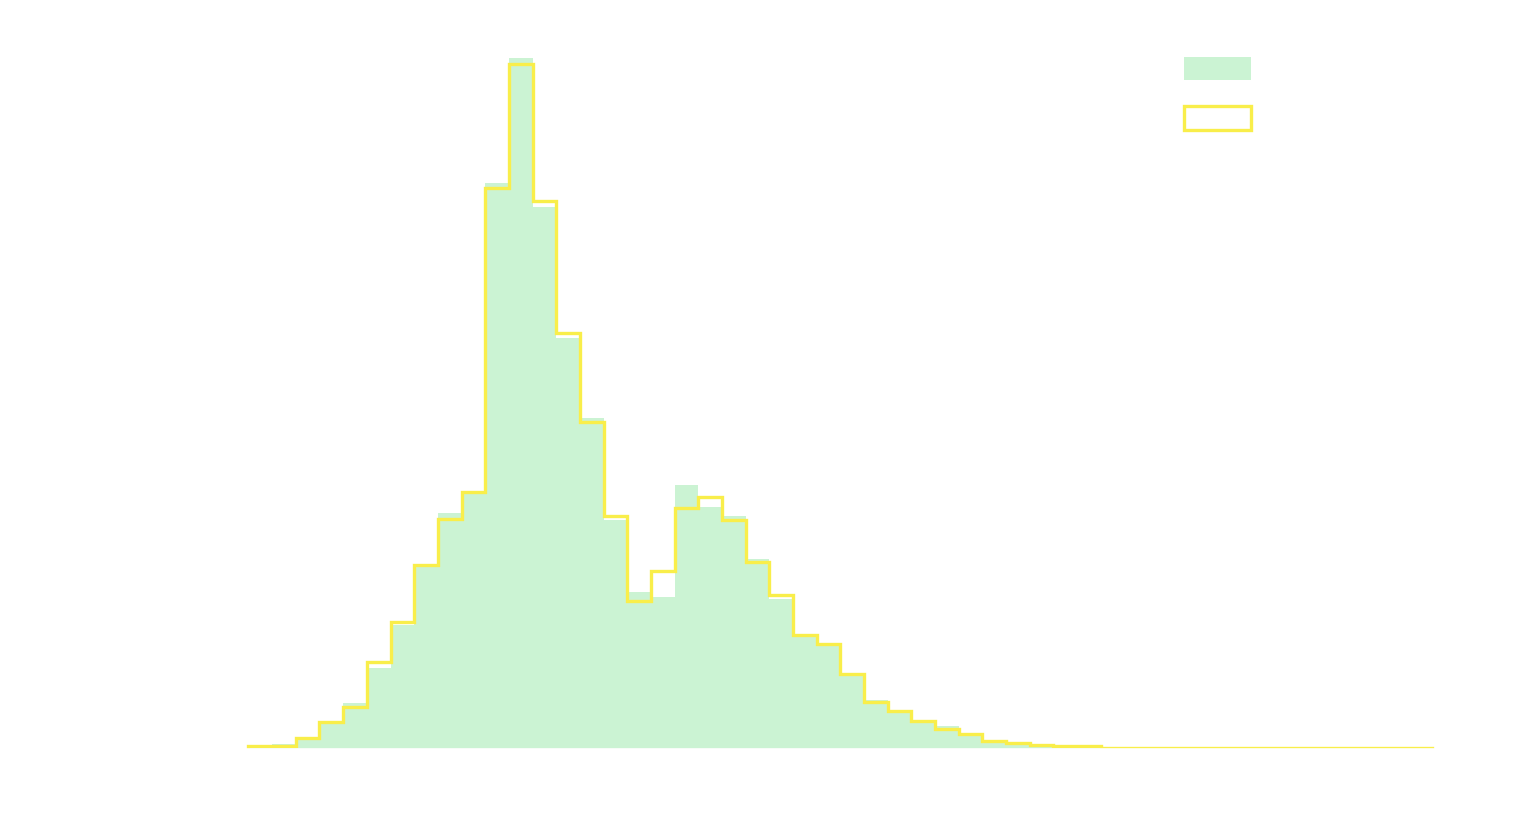

In [95]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label='Data')
plt.hist(samp_percentile_1, bins=bins, density=True, histtype='step', label='Percentiles')
plt.ylabel('Probability')
plt.legend();